In [1]:
import copy
import numpy as np
import nltk
import pdb ## in case of tracing back
#pdb.set_trace()
nltk.download('gutenberg')
from nltk.corpus import gutenberg
print(gutenberg.fileids())
import matplotlib.pyplot as plt
from copy import deepcopy
##可变对象（比如字典或者列表），'=' 是进行传址赋值，会修改函数指向的地址内的内容，所以这里需要运用copy.deepcopy，防止原始内容被修改
##不可变数据（3 个）：Number（数字）、String（字符串）、Tuple（元组; 可变数据（3 个）：List（列表）、Dictionary（字典）、Set（集合）。
textname_list=copy.deepcopy(gutenberg.fileids())
print(f'the orignal length of names_list is: {len(textname_list)}')
nltk.download('punkt')
import time
start_time=time.time()

##analysis the orignal data, delete the books with words which is less than 100*200
import string
from numpy import *
import pandas as pd
from pandas import DataFrame
data_list=[]

#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

punctuation=string.punctuation

for name in textname_list:
  text0=gutenberg.raw(name)
  tokenized_sents=nltk.sent_tokenize(text0)
  sents_lenlist=[]
  count=0
  line_num=0
  word_num=0
  for line in tokenized_sents:
    count_sents_words=0
    line_words=nltk.word_tokenize(line)
    for w in line_words:
      if not w in punctuation:
        count_sents_words+=1
        word_num+=1
    sents_lenlist.append(count_sents_words)
    if count_sents_words>=100:
      count+=1
  if word_num<200*100:
    textname_list.remove(name)
  data_list.append([name,len(sents_lenlist),round(mean(sents_lenlist),1),count,word_num/100])
  #print(f'sents_lenlist is {sents_lenlist}')
'''
  plt.figure()
  plt.plot(range(1,len(sents_lenlist)+1),sents_lenlist)
  plt.title(name)
'''

data_df=pd.DataFrame(data_list)
data_df.columns=['book ','total_sents ','mean_token ','ideal_sents ','total_token/100']     
print(data_df)
print(f'the number of left books is is {len(textname_list)}')
print(textname_list)

## cleaning books: which can not find its author
import re
import string
# don't know the author of the forth book: new book4 --[The King James Bible]-->remove
book_author={}
authorlist=[]

for name in textname_list:
    tokenized_sents_eachbook=nltk.sent_tokenize(gutenberg.raw(name))
    for line in tokenized_sents_eachbook:
      ## why not author = re.match(r'[.* by (.*) [0-9]+]',line), the left '[' is not highlighted as the right/close one
      matchobj=re.match(r'.* by (.*) [0-9]*]',line)
      if matchobj:
        author = (matchobj).group(1)
        break
      else:
        author=None
    book_author[name]=author

for k,v in book_author.items():
  if v==None:
    textname_list.remove(k)
  else:
    authorlist.append(k)

print(len(authorlist))
print(f'the number of left books is {len(textname_list)}')
print(textname_list)

print(data_df.loc[data_df['book '].isin(textname_list)])

#randomly pick 5 book with different author and label it

import random
random.seed(0)
random_num_list=[]
author_list=[]
author_list_idx={}
num_book=0
while num_book<5:
  # randint(a,b) means the value between a and b(including a and b), so len(textname_list) should minus 1, in case of out of index range
  random_num = random.randint(0,len(textname_list)-1)
  random_author = book_author[textname_list[random_num]]
  if (random_num not in random_num_list and random_author not in author_list):
    random_num_list.append(random_num)
    author_list.append(random_author)
    num_book+=1

for i in range(len(author_list)):
  author_list_idx[author_list[i]]=i+1

print(author_list_idx)
print(list(zip(random_num_list,author_list)))
book_name_list=[]
for i in random_num_list:
  book_name_list.append(textname_list[i])

print(f'bookname_author {zip(book_name_list,author_list)}')

## extract 200 partition and each partition has 100 tokens
import numpy
from sklearn.model_selection import cross_val_score
sents_author=[]
for i, author in zip(random_num_list,author_list):
  book_token_list=[] 
  text=gutenberg.raw(textname_list[i])
  tokenized_sents=nltk.sent_tokenize(text)
  tokenized_words=nltk.word_tokenize(text)
  for w in tokenized_words:
    if w not in punctuation:
      book_token_list.append(w)
  for i in range(0,200):
    sent=''
    for t in book_token_list[((i+1)*100-100):(i+1)*100]:
      sent=sent+' '+t
    sents_author.append((sent,author))

random.seed(2)
random.shuffle(sents_author)
print(numpy.array(sents_author[0:5]))
print(len(sents_author))
#print(sents_author)
#sents_author: [(' The Wisdom of Father Brown by G. K. Chesterton 1914 I The Absence of Mr Glass THE consulting-rooms of Dr Orion Hood the eminent criminologist and specialist in certain moral disorders lay along the sea-front at Scarborough in a series of very large and well-lighted french windows which showed the North Sea like one endless outer wall of blue-green marble In such a place the sea had something of the monotony of a blue-green dado for the chambers themselves were ruled throughout by a terrible tidiness not unlike the terrible tidiness of the sea It must not be supposed that', 'G. K. Chesterton'), ..]
    

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
the orignal length of names_list is: 18
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
                      book   total_sents   mean_token   ideal_sents   \
0           austen-emma.txt          7493         22.5            91   
1     austen-persuasion.txt          3654         23.4            36   
2          austen-sense.txt          4833         25.8            52   
3             bible-kj

In [2]:
print(list(zip(book_name_list,author_list)))

[('chesterton-brown.txt', 'G. K. Chesterton'), ('whitman-leaves.txt', 'Walt Whitman'), ('austen-emma.txt', 'Jane Austen'), ('carroll-alice.txt', 'Lewis Carroll'), ('melville-moby_dick.txt', 'Herman Melville')]


In [3]:
##cleaning data: lower-->drop punctuation-->identify special entities/drop stopwords-->lemmatization
##count words
import spacy
import spacy
import nltk
import math
import string
import nltk.stem
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')
punctuation = [char for char in string.punctuation]
s=nltk.stem.SnowballStemmer('english')
nlp=spacy.load('en_core_web_sm')
analysis_text=[]

def clean_text(sents_author):
  result=[]
  word_set=[]
  for corpus_author in sents_author:
    text, label = corpus_author[0], corpus_author[1]
    lower_text = text.lower()
    tokens=nltk.word_tokenize(lower_text)
    drop_punctuation=[w for w in tokens if w not in punctuation]
    doc=nlp(lower_text)
    ent_label =[(ent.text, ent.label_) for ent in doc.ents]
    entities = []
    ## in case of warning because there is not entities in one text
    if ent_label:
      entities, label_=zip(*ent_label) 
    #ent_stopwords=[w for w in drop_punctuation if w in entities]#only keep the entities
    ent_stopwords=[w for w in drop_punctuation if w in entities or not w in stopwords.words('english')]#keep entities but drop stopwords
    #ent_stopwords=[w for w in drop_punctuation]
    clean_text = []
    sents=' '
    for i in ent_stopwords:
      sents=sents+(s.stem(i))+' '
      clean_text.append(s.stem(i))
    #print(sents,label)
    analysis_text.append(sents)
    word_set.extend(clean_text)
    count = dict(Counter(clean_text))
    result.append((count,label))
  return result, word_set


wordcount_author,word_set=clean_text(sents_author)
print(analysis_text[0:2])

word_set.sort()
word_set=set(word_set)

print(wordcount_author[0])

##****word_set is the key word lib
'''
# data clean result:
#[({'know': 1, 'mechanical': 1}, 'William Shakespeare'), ({'trade': 1, 'sir': 1, 'hope': 1, 'may': 1, 'vse': 1}, 'William Shakespeare')]

for i in range(len(wordcount_author)):
  print(wordcount_author[i])

print(word_set)
print(len(word_set))
'''

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[" tug teat brood turkey-hen half-spread wing see old law press foot earth spring hundr affect scorn best relat enamour 'd grow out-door men live among cattl tast ocean wood builder steerer ship wielder axe maul driver hors eat sleep week week ", " song special strain sing none whole result rise last float round full-orb 'd eidolon sing sing rais present past perenni tree root present past time space dilat fuse immort law make law unto read book read book biographi famous said author call man 's life "]
({'tug': 1, 'teat': 1, 'brood': 1, 'turkey-hen': 1, 'half-spread': 1, 'wing': 1, 'see': 1, 'old': 1, 'law': 1, 'press': 1, 'foot': 1, 'earth': 1, 'spring': 1, 'hundr': 1, 'affect': 1, 'scorn': 1, 'best': 1, 'relat': 1, 'enamour': 1, "'d": 1, 'grow': 1, 'out-door': 1, 'men': 1, 'live': 1, 'among': 1, 'cattl': 1, 'tast': 1, 'ocean': 1, 'wood': 1, 'builder': 1, 'steerer': 

"\n# data clean result:\n#[({'know': 1, 'mechanical': 1}, 'William Shakespeare'), ({'trade': 1, 'sir': 1, 'hope': 1, 'may': 1, 'vse': 1}, 'William Shakespeare')]\n\nfor i in range(len(wordcount_author)):\n  print(wordcount_author[i])\n\nprint(word_set)\nprint(len(word_set))\n"

In [4]:
#padding features:
def padding_features(wordcount_author):
  features=[]
  for pair in wordcount_author:
    item,author = pair[0], pair[1]
    for word in word_set:
      if not word in item:
        item[word]=0
      else:
        continue
    item_sorted={k:item[k] for k in sorted(item.keys(),reverse=True)}
    features.append((item_sorted,author))
  return features

BOW_features_author=padding_features(wordcount_author)

X_set,Y_set=zip(*BOW_features_author)

X_set_value=[list(item.values()) for item in X_set]
Y_set_value=[author_list_idx[author] for author in Y_set]

X_train, X_test=X_set_value[0:round(len(X_set_value)*0.8)],X_set_value[round(len(X_set_value)*0.8):len(X_set)]
Y_train, Y_test=Y_set_value[0:round(len(X_set_value)*0.8)],Y_set_value[round(len(X_set_value)*0.8):len(X_set)]
'''
for i in range(len(BOW_BOW_features_author)):
  print(BOW_BOW_BOW_features_author[i])

print(f'X_set is {X_set}')
print(f'Y_set is {Y_set}')

print(f'X_set_value is {X_set_value}')
print(f'Y_set_value is {Y_set_value}')
print(Y_train)
'''

"\nfor i in range(len(BOW_BOW_features_author)):\n  print(BOW_BOW_BOW_features_author[i])\n\nprint(f'X_set is {X_set}')\nprint(f'Y_set is {Y_set}')\n\nprint(f'X_set_value is {X_set_value}')\nprint(f'Y_set_value is {Y_set_value}')\nprint(Y_train)\n"

In [5]:
##built BOW_SVC model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
BOW_SVC=SVC(kernel='linear', probability=True)
Y_pred=cross_val_predict(BOW_SVC,X_set_value,Y_set_value,cv=10)
#model_performance('BOW_SVC', Y_set_value, Y_pred)
#BOW_SVC_accuracy=cross_val_score(BOW_SVC,X_set_value,Y_set_value,cv=10)


In [6]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

##error analysis
#X_analysis: [" as they tug at her teat the brood of the turkey-hen and she with her half-spread wing i see in them and myself the same old law the press of my foot to the earth spring a hundr affect they scorn the best i can do to relat them i am enamour 'd of grow out-door of men that live among cattl or tast of the ocean or wood of the builder and steerer of ship and the wielder of axe and maul and the driver of hors i can eat and sleep with them week in and week out ", " song no special strain to sing none for itself but from the whole result rise at last and float a round full-orb 'd eidolon for him i sing for him i sing i rais the present on the past as some perenni tree out of it root the present on the past with time and space i him dilat and fuse the immort law to make himself by them the law unto himself when i read the book when i read the book the biographi famous and is this then said i what the author call a man 's life "]
list_idx_author={1:'G. K. Chesterton', 2:'Walt Whitman', 3:'Jane Austen', 4:'Lewis Carroll', 5:'Herman Melville'}
author_lists=['G. K. Chesterton','Walt Whitman','Jane Austen','Lewis Carroll','Herman Melville']
import pandas as pd
from pandas import DataFrame
error_list=[]

def error_analysis(model_name, X_analysis, Y_real, Y_pred):
  for i in range(len(Y_real)):
    if Y_real[i] != Y_pred[i]:
      error_list.append([X_analysis[i],list_idx_author[Y_real[i]],list_idx_author[Y_pred[i]]])

  print(f'error analysis for {model_name}')
  data_df2=pd.DataFrame(error_list)
  data_df2.columns=['text', 'author_real', 'author_pred'] 
  print(f'data type is {type(data_df2)}')
  #print(data_df2)
  
  return data_df2


In [7]:
data_df2=error_analysis('BOW_SVC model', analysis_text, Y_set_value, Y_pred)

error analysis for BOW_SVC model
data type is <class 'pandas.core.frame.DataFrame'>


In [8]:
type(data_df2)

pandas.core.frame.DataFrame

In [9]:
data_df2.loc[data_df2['author_real']=='G. K. Chesterton']

,text,author_real,author_pred
6,dare n't say -- ca n't say -- 's clever bolde...,G. K. Chesterton,Lewis Carroll
18,subject choos -- avoid well puzzl dreyfus cas...,G. K. Chesterton,Herman Melville
20,valogn turn head sharpli suppress exclam flam...,G. K. Chesterton,Herman Melville
23,head make bodi insignific graviti great physi...,G. K. Chesterton,Walt Whitman
28,seymour one intellig man twenti unintellig co...,G. K. Chesterton,Jane Austen
29,scientif eye human histori seri collect movem...,G. K. Chesterton,Walt Whitman
32,evolutionari -- republican govern put conside...,G. K. Chesterton,Herman Melville
33,sit oh silent eloqu -- politician time come s...,G. K. Chesterton,Herman Melville
34,man warm concern larg theori alway relish app...,G. K. Chesterton,Jane Austen
39,say word -- `well let littl fun know blow may...,G. K. Chesterton,Walt Whitman


In [10]:
text2=data_df2[data_df2['author_real']=='G. K. Chesterton']["text"]
print(text2)

6      dare n't say -- ca n't say -- 's clever bolde...
18     subject choos -- avoid well puzzl dreyfus cas...
20     valogn turn head sharpli suppress exclam flam...
23     head make bodi insignific graviti great physi...
28     seymour one intellig man twenti unintellig co...
29     scientif eye human histori seri collect movem...
32     evolutionari -- republican govern put conside...
33     sit oh silent eloqu -- politician time come s...
34     man warm concern larg theori alway relish app...
39     say word -- `well let littl fun know blow may...
40     suppos person posit trust '' went priest '' b...
Name: text, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
6      dare n't say -- ca n't say -- 's clever bolde...
18     subject choos -- avoid well puzzl dreyfus cas...
20     valogn turn head sharpli suppress exclam flam...
23     head make bodi insignific graviti great physi...
28     seymour one intellig man twenti unintellig co...
29     scientif eye human histori seri collect movem...
32     evolutionari -- republican govern put conside...
33     sit oh silent eloqu -- politician time come s...
34     man warm concern larg theori alway relish app...
39     say word -- `well let littl fun know blow may...
40     suppos person posit trust '' went priest '' b...
Name: text, dtype: object
5      left brown studi took measur bench found foot...
10     live creatur dead mankind includ univers prov...
12     '' `` oh '' said look sort diabol funni `` ha...
14     scarc good thing 's piti one man proper perso...
16     everi one know m

[Text(0, 0.5, '')]

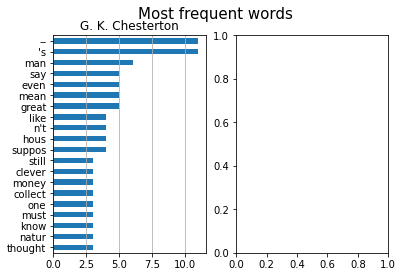

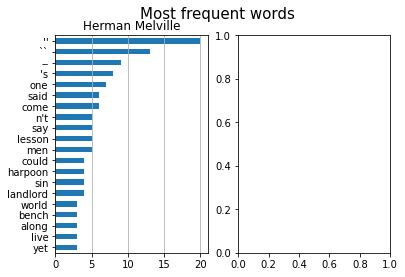

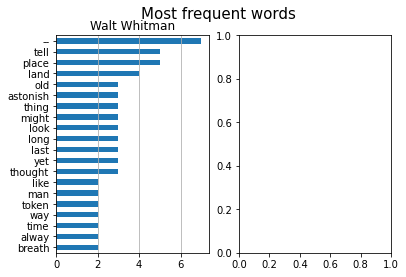

In [12]:
top=20
nltk.download('punkt')
## for vectorizer
from sklearn import feature_extraction, manifold


##the first books
y = "G. K. Chesterton"
corpus = data_df2[data_df2["author_real"]==y]["text"]
print(corpus)
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title=y, ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    

##the fifth books
y = "Herman Melville"
corpus = data_df2[data_df2["author_real"]==y]["text"]
print(corpus)
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title=y, ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    


##new book
y = "Walt Whitman"
corpus = data_df2[data_df2["author_real"]==y]["text"]
print(corpus)
lst_tokens = nltk.tokenize.word_tokenize(corpus.str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title=y, ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
